# hydronetworks

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from hydronetworks import HydroNetworks

## 1. Specify file paths

In [2]:
in_path = Path("test_data")
out_path = Path("test_output")

rivers_path = in_path / "rivers.geojson"
dem_path = in_path / "dem.tif"
flow_path = in_path / "flow.tif"
flowacc_path = in_path / "flowacc.tif"

## 2. Read in all the necessary files
And do some quick sanity checks

In [3]:
net = HydroNetworks(
    rivers_path=rivers_path,
    dem_path=dem_path,
    flow_path=flow_path,
    flowacc_path=flowacc_path,
)

Global Streamflow dataset


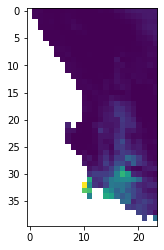

In [4]:
print("Global Streamflow dataset")
plt.imshow(net.flow.read(1))
plt.show()

DEM


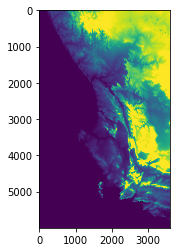

In [5]:
print("DEM")
plt.imshow(net.dem.read(1), vmin=0, vmax=1000)
plt.show()

Rivers with 47 segments


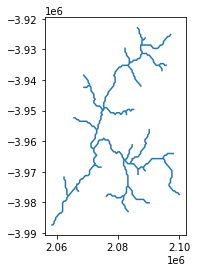

In [6]:
print("Rivers with", len(net.rivers), "segments")
net.rivers.plot()
plt.show()

## 2. Process network and attributes
These will be the main data structures for holding the river network, and the nodes where rivers join

In [7]:
net.create_network()

Then calculate Shreve stream order for the network
This allows to easily keep track of what is upstream and downstream

In [8]:
net.assign_streamorder()

And import elevation, gscd etc for each node

In [9]:
net.load_attributes()

Convert to GeoDataFrames

In [10]:
net.network_to_gdf()

## 3. Calculate local flow and hydro potential

In [11]:
net.local_flowacc()
net.calculate_hydro()

## 4. Sanity check and save

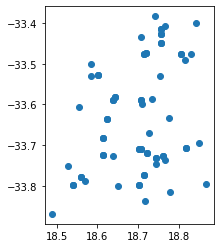

In [12]:
net.nodes_out.plot()

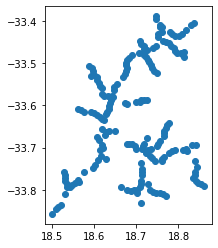

In [13]:
net.hydro_points.plot()

In [14]:
net.save_results(out_path)